<a href="https://colab.research.google.com/github/nptikiran/Python-program/blob/main/MentalHealthAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [1]:
#Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

##Reading and cleanning data

In [2]:
df_MHdata=pd.read_csv("/content/Mental Health Data.csv")

In [3]:
## checking the dataframe
df_MHdata.head(n=3)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Would you feel comfortable discussing a mental health disorder with your coworkers?,Do you feel that your employer takes mental health as seriously as physical health?,Do you know local or online resources to seek help for a mental health disorder?,Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",How willing would you be to share with friends and family that you have a mental illness?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,1 to 5,1.0,NaN,Yes,Yes,No,No,Somewhat difficult,Maybe,I don't know,NaN,NaN,NaN,Somewhat open,Yes,Yes,No,Yes,"Mood Disorder (Depression, Bipolar Disorder, e...",1,Sometimes,Often,33,Male,Canada,NaN,Canada,NaN,Back-end Developer,Sometimes
1,0,1 to 5,1.0,NaN,No,No,No,I don't know,Very easy,Yes,I don't know,NaN,NaN,NaN,Very open,No,Yes,No,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)",1,Not applicable to me,Not applicable to me,40,male,Netherlands,NaN,Netherlands,NaN,Front-end Developer|Back-end Developer,Sometimes
2,0,1 to 5,1.0,NaN,Yes,Yes,No,I don't know,I don't know,Maybe,I don't know,NaN,NaN,NaN,Somewhat open,No,No,No,No,NaN,0,Not applicable to me,Not applicable to me,21,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer|DevOps/SysAdmin,Never


In [4]:
## shape of the dataframe
df_MHdata.shape

(1433, 31)

In [5]:
## Rename the columns
a=list(df_MHdata.columns)
b=['self_employed','no_of_employees','tech_company','role_IT','mental_healthcare_coverage',
  'knowledge_about_mental_healthcare_options_workplace','employer_discussed_mental_health ',
  'employer_offer_resources_to_learn_about_mental_health','medical_leave_from_work ',
  'comfortable_discussing_with_coworkers','employer_take_mental_health_seriously',
   'knowledge_of_local_online_resources ','productivity_affected_by_mental_health ',
   'percentage_work_time_affected_mental_health','openess_of_family_friends',
  'family_history_mental_illness','mental_health_disorder_past',
   'currently_mental_health_disorder','diagnosed_mental_health_condition',
   'type_of_disorder','treatment_from_professional',
   'while_effective_treatment_mental_health_issue_interferes_work',
  'while_not_effective_treatment_interferes_work ','age','gender','country','US state',
  'country work ','US state work','role_in_company','work_remotely','']
  
for i,j in zip(a,b):
    df_MHdata.rename(columns={i:j},inplace=True)

In [6]:
## information of Dataframe
df_MHdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 31 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   self_employed                                                  1433 non-null   int64  
 1   no_of_employees                                                1146 non-null   object 
 2   tech_company                                                   1146 non-null   float64
 3   role_IT                                                        263 non-null    float64
 4   mental_healthcare_coverage                                     1146 non-null   object 
 5   knowledge_about_mental_healthcare_options_workplace            1013 non-null   object 
 6   employer_discussed_mental_health                               1146 non-null   object 
 7   employer_offer_resources_to_learn_about_mental_health       

In [7]:
## No of Missing values in different Columns
columns=df_MHdata.columns
pd.DataFrame({'no of missing values':df_MHdata.isnull().sum()})

,no of missing values
self_employed,0
no_of_employees,287
tech_company,287
role_IT,1170
mental_healthcare_coverage,287
knowledge_about_mental_healthcare_options_workplace,420
employer_discussed_mental_health,287
employer_offer_resources_to_learn_about_mental_health,287
medical_leave_from_work,287
comfortable_discussing_with_coworkers,287


In [8]:
## copy the dataset in df1
df1=df_MHdata.copy()

In [9]:
## Drop the unnecessary colums 
cols = ['role_IT','knowledge_of_local_online_resources ',
        'productivity_affected_by_mental_health ',
        'percentage_work_time_affected_mental_health']
df_red=df1.drop(cols,axis=1)

### Cleanning different column

In [10]:
## No of Employees column
df_red.no_of_employees.unique()

array(['1 to 5', '6 to 25', '26-99', '100-500', '26-100', '500-1000',
       'More than 1000', nan], dtype=object)

In [11]:
df_red.no_of_employees.replace(to_replace=['1 to 5', '6 to 25','More than 1000','26-99'],
                                value=['1-5','6-25','>1000','26-100'],inplace=True)

In [12]:
df_red.no_of_employees.value_counts()

26-100      326
>1000       256
100-500     248
6-25        176
500-1000     80
1-5          60
Name: no_of_employees, dtype: int64

In [13]:
## Cleaning Mental Health Care coverage column
df_red.mental_healthcare_coverage.unique()

array(['Yes', 'No', "I don't know", 'Not eligible for coverage / N/A',
       nan], dtype=object)

In [14]:
df_red.mental_healthcare_coverage.replace(to_replace=['Not eligible for coverage / N/A'],
                                value='No',inplace=True)
df_red.mental_healthcare_coverage.unique()

array(['Yes', 'No', "I don't know", nan], dtype=object)

In [15]:
## Cleaning openess_of_family_friends column
df_red.openess_of_family_friends.unique()

array(['Somewhat open', 'Very open', 'Somewhat not open', 'Neutral',
       'Not applicable to me (I do not have a mental illness)',
       'Not open at all'], dtype=object)

In [16]:
df_red.openess_of_family_friends.replace(to_replace=['Not applicable to me (I do not have a mental illness)']
                                          ,value="I don't know",inplace=True)
df_red.openess_of_family_friends.unique()

array(['Somewhat open', 'Very open', 'Somewhat not open', 'Neutral',
       "I don't know", 'Not open at all'], dtype=object)

In [17]:
## Cleaning the age column remove outliers
med_age = df_red[(df_red['age'] >= 18) | (df_red['age'] <= 75)]['age'].median()
df_red['age'].replace(to_replace = df_red[(df_red['age'] < 18) | (df_red['age'] > 75)]['age'].tolist(),
                          value = med_age, inplace = True)

In [18]:
## Cleaning the gender column
df_red.gender.unique()

array(['Male', 'male', 'F', 'Transitioned, M2F', 'Other/Transfeminine',
       'M', 'female', 'm', 'Female', 'f', 'non-binary', 'woman', 'male ',
       'Male ', 'Bigender', 'Genderfluid (born female)',
       'male 9:1 female, roughly', 'Male (cis)', 'Other', 'Sex is male',
       'genderqueer', 'Human', 'mail', 'Cis-woman',
       'female-bodied; no feelings about gender', 'Transgender woman',
       'Genderfluid', 'female ', 'Male/genderqueer', 'fem', 'Nonbinary',
       ' Female', 'Female ', 'Genderqueer', nan, 'I identify as female.',
       'fm', 'Cis female ', 'female/woman', 'Androgynous', 'man',
       'nb masculine', 'Cisgender Female', 'Woman', 'Cis Male',
       'Female or Multi-Gender Femme', 'Male.', 'Enby', 'Agender',
       'Female (props for making this a freeform field, though)',
       'cis man', 'Female assigned at birth ', 'Cis male', 'Man',
       'none of your business', 'cis male', 'genderqueer woman', 'Queer',
       'Dude', 'Male (trans, FtM)', 'cisdude', 'Gen

In [19]:
df_red['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 'male', inplace = True)
df_red['gender'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 'female', inplace = True)
df_red['gender'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 'other', inplace = True)

In [20]:
df_red.gender.unique()

array(['male', 'female', 'other', nan], dtype=object)

In [22]:
## Cleaning the role_in_company
tech_list = []
tech_list.append(df_red[df_red['role_in_company'].str.contains('Back-end')]['role_in_company'].tolist())
tech_list.append(df_red[df_red['role_in_company'].str.contains('Front-end')]['role_in_company'].tolist())
tech_list.append(df_red[df_red['role_in_company'].str.contains('Dev')]['role_in_company'].tolist())
tech_list.append(df_red[df_red['role_in_company'].str.contains('DevOps')]['role_in_company'].tolist())
flat_list = [item for sublist in tech_list for item in sublist]
flat_list = list(dict.fromkeys(flat_list))

In [23]:

## Replace tech role=1 and other=0 in a new tech role operation
df_red['tech_role']=df_red['role_in_company']
df_red['tech_role'].replace(to_replace=flat_list,value=1,inplace=True)
remain_list=df_red['tech_role'].unique()[1:]
df_red['tech_role'].replace(to_replace=remain_list,value=0,inplace=True)

In [24]:
df_red.tech_role.value_counts()


1    1045
0     388
Name: tech_role, dtype: int64

In [25]:
df_red=df_red.drop(['role_in_company'],axis=1)    

## Handling missing values

In [26]:
df_rej=pd.concat([df_red['type_of_disorder'],df_red['US state'],df_red['US state work']],axis=1)
df_red=df_red.drop(['type_of_disorder','US state','US state work'],axis=1)

In [27]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df_red)
imp_data=pd.DataFrame(data=imp.transform(df_red),columns=df_red.columns)

In [28]:
df_eda=pd.concat([imp_data,df_rej],axis=1)
df_eda.isnull().sum().to_frame()
# 

,0
self_employed,0
no_of_employees,0
tech_company,0
mental_healthcare_coverage,0
knowledge_about_mental_healthcare_options_workplace,0
employer_discussed_mental_health,0
employer_offer_resources_to_learn_about_mental_health,0
medical_leave_from_work,0
comfortable_discussing_with_coworkers,0
employer_take_mental_health_seriously,0


#3. EDA

A. Questions with regard to the Target:
1.  If a person is self employed then is there a higher chance of mental disorder?
2.  Does big size of the company affect your mental health condition adversely?
3.  Does working in a tech company affect adversely to your mental well being?
5.  Will offering more options to learn about mental health reduces the chance of getting positive?
8.  If Employer takes mental health seriously, then will it reduce the chance of positive diagonosis?
10.  What are the chances that if a person having family history of mental illness then he is diagonised positive?
13.  How many of those who has diagonised positively will seek help of professional?
15.  Is the chances of getting positively diagonised increases with age?
16.  Is there any chance that a other gender category is more positively diagonised than other gender categories?


### 1.  If a person is self employed then is there a higher chance of mental disorder?

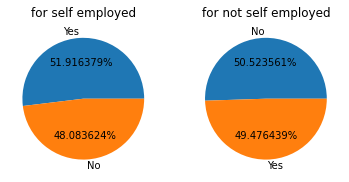

In [39]:
plt.subplot(1,2,1)
plt.title("for self employed")
plt.pie(df_eda[df_eda.self_employed==1]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==1]['diagnosed_mental_health_condition'].value_counts().index);

plt.subplot(1,2,2)
plt.title("for not self employed")
plt.pie(df_eda[df_eda.self_employed==0]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==0]['diagnosed_mental_health_condition'].value_counts().index);

### 2.  Does big size of the company affect your mental health condition adversely?

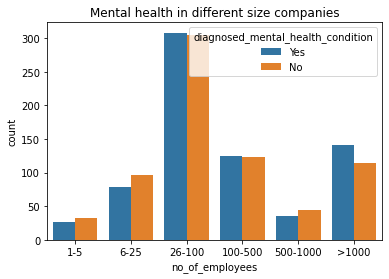

In [40]:
##A.2
sns.countplot(data=df_eda,x='no_of_employees',hue='diagnosed_mental_health_condition')
plt.title('Mental health in different size companies');

### 3.  Does working in a tech company affect adversely to your mental well being?

([<matplotlib.patches.Wedge at 0x7fcbc02793d0>,
 [Text(-0.019708651065785975, 1.0998234263158642, 'Yes'),
  Text(0.019708754038686934, -1.0998234244706022, 'No')],
 [Text(-0.01075017330861053, 0.5999036870813804, '50.570345%'),
  Text(0.010750229475647417, -0.5999036860748739, '49.429658%')])

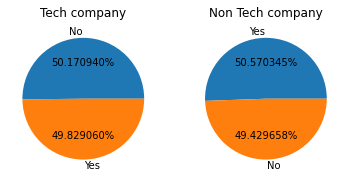

In [31]:
##A.3
plt.subplot(1,2,1)
plt.title("Tech company")
plt.pie(df_eda[df_eda.tech_company==1]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.tech_company==1]['diagnosed_mental_health_condition'].value_counts().index);

plt.subplot(1,2,2)
plt.title("Non Tech company")
plt.pie(df_eda[df_eda.tech_company==0]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.tech_company==0]['diagnosed_mental_health_condition'].value_counts().index);

### 4.  Will offering more options to learn about mental health reduces the chance of getting positive?

Text(0.5, 1.0, 'Mental health Resource offering vs Daignostic Counts')

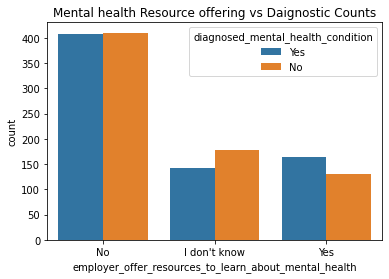

In [32]:
sns.countplot(data=df_eda,x='employer_offer_resources_to_learn_about_mental_health',hue='diagnosed_mental_health_condition')
plt.title('Mental health Resource offering vs Daignostic Counts');

### 5. If Employer takes mental health seriously, then will it reduce the chance of positive diagonosis?

Text(0.5, 1.0, 'Employers seriousness vs Daignostic Counts')

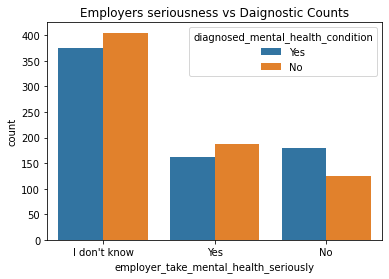

In [33]:
sns.countplot(data=df_eda,x='employer_take_mental_health_seriously',hue='diagnosed_mental_health_condition')
plt.title('Employers seriousness vs Daignostic Counts');

### 6.  What are the chances that if a person having family history of mental illness then he is diagonised positive?

Text(0.5, 1.0, 'Family History vs Daignostic Counts')

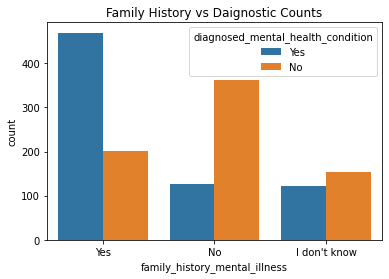

In [34]:
sns.countplot(data=df_eda,x='family_history_mental_illness',hue='diagnosed_mental_health_condition')
plt.title('Family History vs Daignostic Counts');

### 7.  How many of those who has diagonised positively will seek help of professional?

([<matplotlib.patches.Wedge at 0x7fcbc0088050>,
 [Text(-1.0754761146685294, 0.2309786283998678, 'No'),
  Text(1.0754761092620841, -0.23097865357320332, 'Yes')],
 [Text(-0.5866233352737433, 0.12598834276356424, '93.265992%'),
  Text(0.5866233323247732, -0.1259883564944745, '6.734007%')])

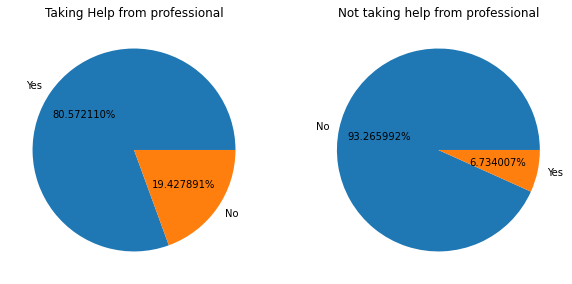

In [35]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Taking Help from professional")
plt.pie(df_eda[df_eda.treatment_from_professional==1]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.treatment_from_professional==1]['diagnosed_mental_health_condition'].value_counts().index);

plt.subplot(1,2,2)
plt.title("Not taking help from professional")
plt.pie(df_eda[df_eda.treatment_from_professional==0]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.treatment_from_professional==0]['diagnosed_mental_health_condition'].value_counts().index);

### 8. Is the chances of getting positively diagonised increases with age?

Text(0.5, 1.0, 'Negetive Diagonosis with age')

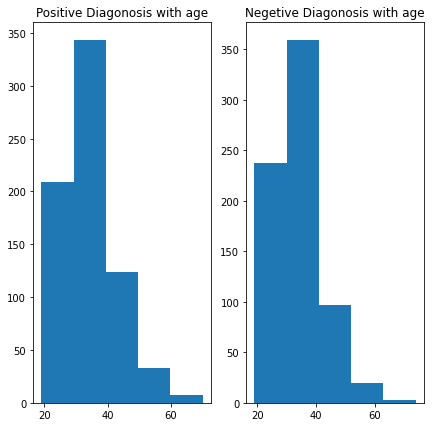

In [36]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.hist(df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['age'],bins=5)
plt.title("Positive Diagonosis with age");

plt.subplot(1,2,2)
plt.hist(df_eda[df_eda.diagnosed_mental_health_condition=='No']['age'],bins=5)
plt.title("Negetive Diagonosis with age");

Above chart shows the age group between 30-40 are maximum affected than any other age group.

### 9.  Is there any chance that a other gender category is more positively diagonised than other gender categories?

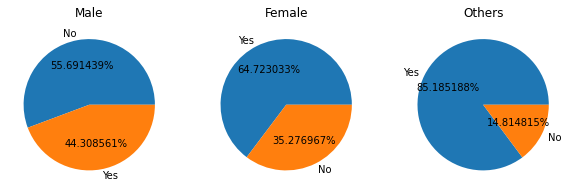

In [38]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Male")
plt.pie(df_eda[df_eda.gender=='male']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.gender=='male']['diagnosed_mental_health_condition'].value_counts().index);

plt.subplot(1,3,2)
plt.title("Female")
plt.pie(df_eda[df_eda.gender=='female']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.gender=='female']['diagnosed_mental_health_condition'].value_counts().index);

plt.subplot(1,3,3)
plt.title("Others")
plt.pie(df_eda[df_eda.gender=='other']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.gender=='other']['diagnosed_mental_health_condition'].value_counts().index);


Above chart shows Females has more suffered with mental health than males. In others categories also shows there are 85 % affected with mental health.